In [34]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torch.optim import SGD 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [35]:
class BasicNN(nn.Module):
    def __init__(self):
        super().__init__()
        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False)
        self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad=False)
        self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad=False)

        self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad=False)
        self.b10 = nn.Parameter(torch.tensor(0.0), requires_grad=False)
        self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad=False)

        self.final_bias = nn.Parameter(torch.tensor(-16.), requires_grad=False)

    def forward(self, input):
        input_to_top_relu = input * self.w00 + self.b00
        top_relu_output = F.relu(input_to_top_relu)
        scaled_top_relu_output = top_relu_output * self.w01

        input_to_bottom_relu = input * self.w10 + self.b10
        bottom_relu_output = F.relu(input_to_bottom_relu)
        scaled_bottom_relu_output = bottom_relu_output * self.w11

        input_to_final_relu = scaled_top_relu_output + scaled_bottom_relu_output + self.final_bias

        output = F.relu(input_to_final_relu)

        return output 


In [36]:
input_doses = torch.linspace(start=0, end=1, steps=11)
print(input_doses)

tensor([0.0000, 0.1000, 0.2000, 0.3000, 0.4000, 0.5000, 0.6000, 0.7000, 0.8000,
        0.9000, 1.0000])


tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0100, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000])


<Axes: xlabel='None'>

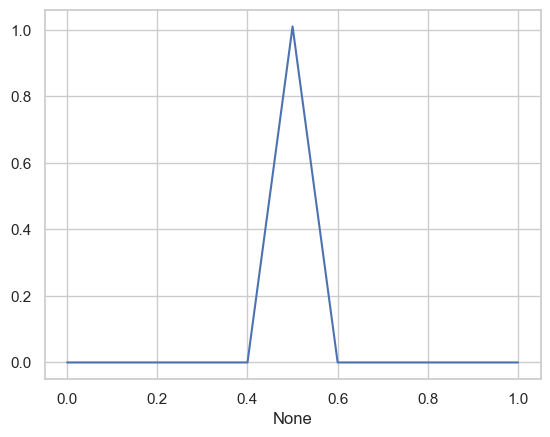

In [37]:
model = BasicNN()

output_values = model(input_doses)

print(output_values)

sns.set(style="whitegrid")

sns.lineplot(x=input_doses, y=output_values.detach().numpy())

In [38]:
class BasicNN_train(nn.Module):
    def __init__(self):
        super().__init__()
        self.w00 = nn.Parameter(torch.tensor(1.7), requires_grad=False)
        self.b00 = nn.Parameter(torch.tensor(-0.85), requires_grad=False)
        self.w01 = nn.Parameter(torch.tensor(-40.8), requires_grad=False)

        self.w10 = nn.Parameter(torch.tensor(12.6), requires_grad=False)
        self.b10 = nn.Parameter(torch.tensor(0.0), requires_grad=False)
        self.w11 = nn.Parameter(torch.tensor(2.7), requires_grad=False)

        self.final_bias = nn.Parameter(torch.tensor(0.), requires_grad=True)

    def forward(self, input):
        input_to_top_relu = input * self.w00 + self.b00
        top_relu_output = F.relu(input_to_top_relu)
        scaled_top_relu_output = top_relu_output * self.w01

        input_to_bottom_relu = input * self.w10 + self.b10
        bottom_relu_output = F.relu(input_to_bottom_relu)
        scaled_bottom_relu_output = bottom_relu_output * self.w11

        input_to_final_relu = scaled_top_relu_output + scaled_bottom_relu_output + self.final_bias

        output = F.relu(input_to_final_relu)

        return output 

tensor([ 0.0000,  3.4020,  6.8040, 10.2060, 13.6080, 17.0100, 13.4760,  9.9420,
         6.4080,  2.8740,  0.0000], grad_fn=<ReluBackward0>)


<Axes: xlabel='None'>

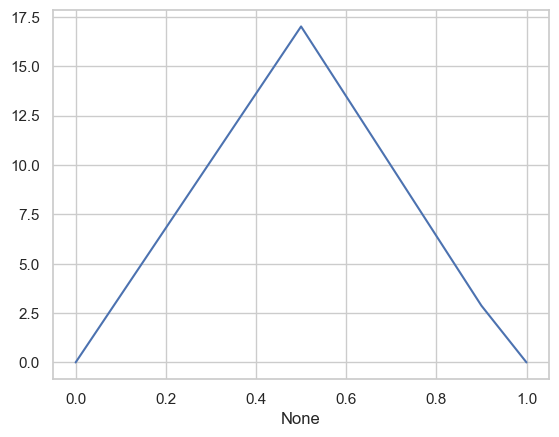

In [39]:
model = BasicNN_train()

output_values = model(input_doses)

print(output_values)

sns.set(style="whitegrid")

sns.lineplot(x=input_doses, y=output_values.detach().numpy())

In [43]:
inputs = torch.tensor([0., .5, 1.])
labels = torch.tensor([0., 1., 0.])

optimizer = SGD(model.parameters(), lr=0.01)

print("Final bias before training: " + str(model.final_bias.data) + "\n")

for epoch in range(100):
    total_loss = 0

    for iteration in range(len(inputs)):
        input_i = inputs[iteration]
        label_i = labels[iteration]

        output_i = model(input_i)

        loss = (output_i - label_i)**2

        loss.backward()

        total_loss += float(loss)

    if total_loss < 0.0001:
        print("Total number of epochs: " + str(epoch))
        break

    optimizer.step()
    optimizer.zero_grad()

    print("Steps: " + str(epoch) + " Final bias: " + str(model.final_bias.data) + " Loss: " + str(total_loss) + "\n")

Final bias before training: tensor(-15.9727)

Steps: 0 Final bias: tensor(-15.9734) Loss: 0.0013946440303698182

Steps: 1 Final bias: tensor(-15.9741) Loss: 0.0013394285924732685

Steps: 2 Final bias: tensor(-15.9749) Loss: 0.0012863543815910816

Steps: 3 Final bias: tensor(-15.9756) Loss: 0.0012354254722595215

Steps: 4 Final bias: tensor(-15.9762) Loss: 0.0011865105479955673

Steps: 5 Final bias: tensor(-15.9769) Loss: 0.001139549189247191

Steps: 6 Final bias: tensor(-15.9776) Loss: 0.001094419276341796

Steps: 7 Final bias: tensor(-15.9782) Loss: 0.0010510666761547327

Steps: 8 Final bias: tensor(-15.9789) Loss: 0.00100943841971457

Steps: 9 Final bias: tensor(-15.9795) Loss: 0.0009694824111647904

Steps: 10 Final bias: tensor(-15.9801) Loss: 0.0009310897439718246

Steps: 11 Final bias: tensor(-15.9807) Loss: 0.0008942140266299248

Steps: 12 Final bias: tensor(-15.9813) Loss: 0.0008588098571635783

Steps: 13 Final bias: tensor(-15.9819) Loss: 0.0008247779915109277

Steps: 14 Final 

tensor([0.0000, 0.0000, 0.0000, 0.0000, 0.0000, 1.0098, 0.0000, 0.0000, 0.0000,
        0.0000, 0.0000], grad_fn=<ReluBackward0>)


<Axes: xlabel='None'>

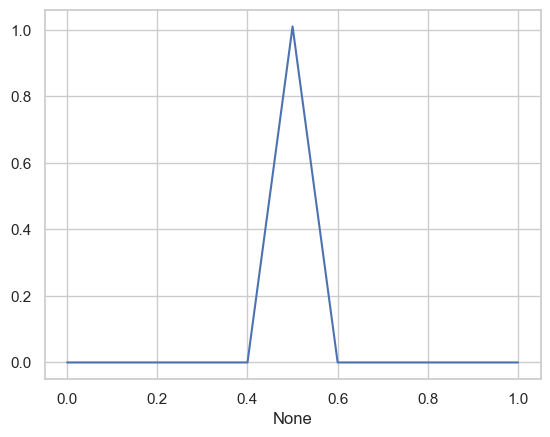

In [48]:


output_values = model(input_doses)

print(output_values)

sns.set(style="whitegrid")

sns.lineplot(x=input_doses, y=output_values.detach().numpy())